In [1]:
import matplotlib.pyplot as plt

from fft import *
import numpy as np
from least_squares import least_squares
import math


In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 150

Text(0.5, 0, 'Date')

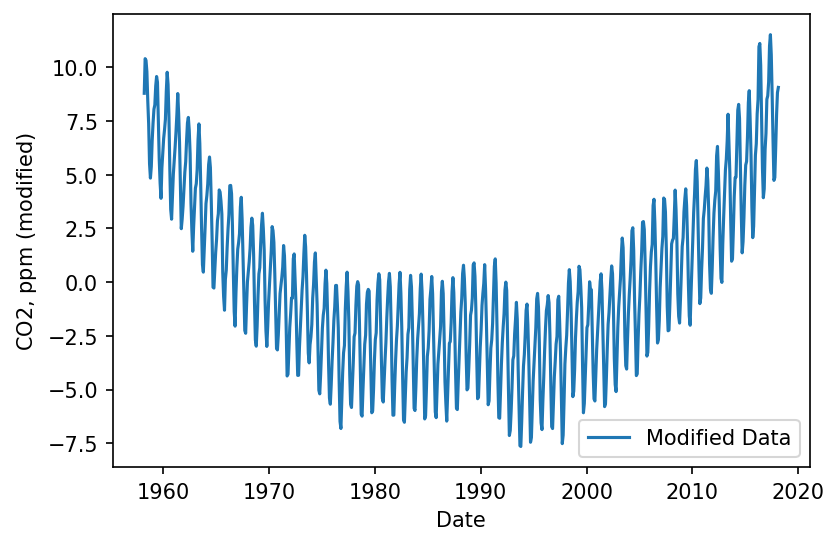

In [3]:
from read_co2 import read_co2

date,cco2 = read_co2('co2_mm_mlo.txt')
x = np.arange(len(cco2))
y = cco2

#### Least Square fit of the CO2 Data
[a0, a1, sigma, sigma_a0, sigma_a1] = least_squares(x, cco2)
#### Subtracting the linear fit
f = (a1*x + a0)
y = y - f
N = len(y)

f1 = plt.figure(1)
#plt.plot( date, cco2, label="Raw Data" )
plt.plot( date, y, label= "Modified Data")
plt.legend()
plt.ylabel('CO${2}$, ppm (modified)')
plt.xlabel('Date')



$\textbf{Answer :} $
We first load the data the same way as we did in the previous part. Then we find the least square fit of the data by using \textit{least_square.py} in the previous part. Once we have the slope $a_1$ and $a_0$ we subtract the linear fit from the data. The modified data is plotted in the above cell. What we observe is linear trend of increase in the concentration has been taken care of without changing the basic periodicity of the data. So we can still get all the frequencies of time series. 

In [4]:

# instead of truncating, pad with values
window = True

N = len(y)
log2N = math.log(N, 2)
next_pow_of_2 = int(log2N) + 1
if log2N - int(log2N) > 0.0 :  
    print("Need to pad")
    ypads = np.full( 2**( next_pow_of_2) - N, 300.0, dtype=np.double)
    y = np.concatenate( (y, ypads) )
    #cco2 = np.concatenate( (cco2, ypads))
    # CAREFUL: When you pad, the x axis becomes somewhat "meaningless" for the padded values, 
    # so typically it is best to just consider it an index
    x = np.arange(len(y))
    N = len(y)
    # Apply a window to reduce ringing from the 2^n cutoff
    if window : 
        print("Used Hann window")
        pp = (0.5 - 0.5 * np.cos(2*np.pi*x/(N-1)))
        y = y * pp
        print(y)
                
Y = fft(y)
#### Smooth the data in the Fourier domain.
#### Adjust this to change the frequencies to delete (frequencies are removed from maxfreq to N/2
#### and accounts for the Nyquist frequency). 
#### Full power spectrum 
ps = fft_power(Y) 

maxfreq = 256
Y[maxfreq:len(Y)-maxfreq] = 0.0
#### Get the absolute value and power for plotting
Y_abs = abs(Y)
powery = fft_power(Y)
powerx = np.arange(powery.size)

#### Now go back to the frequency domain. 

yfiltered = ifft(Y)
#### To compare the data before and after filtering we need to: 
#### Undoing the windowing
if window:
    for ip in range(len(yfiltered)) :
        if pp[ip] > 0.01:
            yfiltered[ip] = yfiltered[ip]/pp[ip]

#### Undoing the padding of the power spectrum
yfiltered = yfiltered[:-len(ypads)]

yfiltered_abs = abs(yfiltered)

xr = np.arange(len(yfiltered_abs))
yfiltered_abs = yfiltered_abs + f

Need to pad
Used Hann window
[0.00000000e+00 9.81112093e-05 3.89481181e-04 ... 1.13168162e-02
 2.82923074e-03 0.00000000e+00]


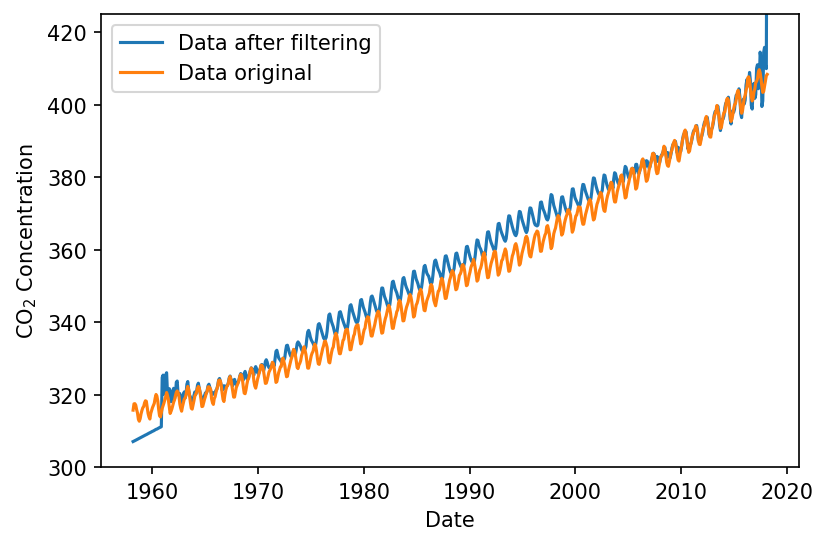

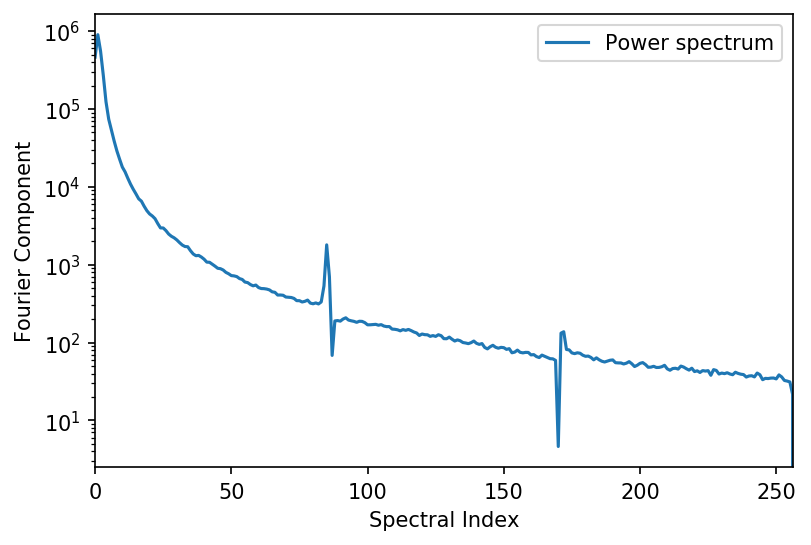

In [5]:
f1 = plt.figure(1)
plt.plot( date, yfiltered_abs, label="Data after filtering" )
plt.plot( date, cco2, label = "Data original" )
plt.legend()
plt.ylim([300,425])
plt.xlabel("Date")
plt.ylabel("CO$_2$ Concentration")

px = np.arange(len(powery))
f2 = plt.figure(2)
plt.plot( px, powery, label="Power spectrum" )
plt.xlim([0,N/4])
plt.legend()
plt.yscale('log')
plt.xlabel("Spectral Index")
plt.ylabel("Fourier Component")

plt.show()



$\textbf{Answer :} $
Next part we pad and window the modified data and perfrom FFT on it. Following FFT we remove all frequencies above $f_{max} = 256 Hz $. We choose a higher cutoff in this case we wanted to observe some of the high frequency curves. Following this we compute the power spectrum and calculate the inverse FFT and try to recover the time series by removing the windowing and the padding.  
From the smoothened time series we add back the linear trand. We observe that the original and modified data is quite similar except some of the effects of windowing reamins at the edges.  